### This is a PROMISE Software Engineering Repository data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

If you publish material based on PROMISE data sets then, please
follow the acknowledgment guidelines posted on the PROMISE repository
web page http://promise.site.uottawa.ca/SERepository .

In [3]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, classification_report, r2_score
from sklearn.model_selection import LeaveOneOut 
from sklearn.model_selection import train_test_split

# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

In [4]:
my_df = pd.read_csv('../Datasets/china.csv',  header=0)
my_df.head()

,id,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
0,1,1,1587,774,260,340,128,0,1502,0,0,4.7,5.0,4.7,5.0,4,0,4.0,7490,7490
1,2,2,260,9,4,3,193,41,51,138,61,16.0,16.6,16.0,16.6,2,0,17.0,4150,4150
2,3,3,152,25,33,28,42,35,163,0,0,4.4,4.1,4.4,4.1,1,0,9.0,668,668
3,4,4,252,151,28,8,39,0,69,153,4,12.8,14.3,15.5,17.3,1,0,4.0,3901,3238
4,5,5,292,93,0,194,20,0,0,307,0,10.3,9.8,12.4,11.7,1,0,13.0,3607,2994


In [5]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
id           499 non-null int64
ID           499 non-null int64
AFP          499 non-null int64
Input        499 non-null int64
Output       499 non-null int64
Enquiry      499 non-null int64
File         499 non-null int64
Interface    499 non-null int64
Added        499 non-null int64
Changed      499 non-null int64
Deleted      499 non-null int64
PDR_AFP      499 non-null float64
PDR_UFP      499 non-null float64
NPDR_AFP     499 non-null float64
NPDU_UFP     499 non-null float64
Resource     499 non-null int64
Dev.Type     499 non-null int64
Duration     499 non-null float64
N_effort     499 non-null int64
Effort       499 non-null int64
dtypes: float64(5), int64(15)
memory usage: 78.0 KB


In [6]:
my_df.describe()

,id,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.0,499.000000,499.000000,499.000000
mean,250.000000,250.000000,486.857715,167.098196,113.601202,61.601202,91.234469,24.234469,360.354709,85.062124,12.352705,11.770541,12.07976,13.269739,13.626253,1.458918,0.0,8.719238,4277.641283,3921.048096
std,144.193157,144.193157,1059.171436,486.338575,221.274374,105.422840,210.270984,85.040996,829.842333,290.857039,124.224130,12.105649,12.81871,14.009840,14.843416,0.823729,0.0,7.347058,7071.248036,6480.855600
min,1.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.30000,0.400000,0.400000,1.000000,0.0,1.000000,31.000000,26.000000
25%,125.500000,125.500000,100.500000,27.000000,13.000000,6.000000,14.000000,0.000000,38.000000,0.000000,0.000000,4.300000,4.20000,4.600000,4.400000,1.000000,0.0,4.000000,776.000000,703.500000
50%,250.000000,250.000000,215.000000,63.000000,42.000000,24.000000,36.000000,0.000000,135.000000,4.000000,0.000000,8.100000,8.00000,8.800000,8.900000,1.000000,0.0,7.000000,2098.000000,1829.000000
75%,374.500000,374.500000,437.500000,152.500000,112.000000,68.500000,84.000000,20.000000,325.500000,87.000000,0.000000,15.400000,15.75000,16.350000,16.900000,2.000000,0.0,11.000000,4192.000000,3826.500000
max,499.000000,499.000000,17518.000000,9404.000000,2455.000000,952.000000,2955.000000,1572.000000,13580.000000,5193.000000,2657.000000,83.800000,96.60000,101.000000,108.300000,4.000000,0.0,84.000000,54620.000000,54620.000000


## Applying Pearson’s correlation

In this section, the correlations between attributes of Desharnais dataset and software effort are analyzed and applicability of the regression analysis is examined. The correlation between two variables is a measure of how well the variables are related. The most common measure of correlation in statistics is the Pearson Correlation (or the Pearson Product Moment Correlation - PPMC) which shows the linear relationship between two variables. 

Pearson correlation coefficient analysis produces a result between `-1` and `1`. A result of `-1` means that there is a perfect negative correlation between the two values at all, while a result of `1` means that there is a perfect positive correlation between the two variables. 

Results between `0.5` and `1.0` indicate high correlation.Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient. `Pearson’s correlation` (also called Pearson’s R) is a correlation coefficient commonly used in linear regression.

In [7]:
my_df.corr()

,id,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
id,1.000000,1.000000,0.053268,0.045150,0.034809,0.022095,0.057919,0.008489,0.051599,0.032999,-0.060592,-0.015122,-0.001246,-0.022466,-0.007516,0.014387,NaN,0.003400,0.063939,0.068739
ID,1.000000,1.000000,0.053268,0.045150,0.034809,0.022095,0.057919,0.008489,0.051599,0.032999,-0.060592,-0.015122,-0.001246,-0.022466,-0.007516,0.014387,NaN,0.003400,0.063939,0.068739
AFP,0.053268,0.053268,1.000000,0.929968,0.712668,0.488186,0.914711,0.402819,0.933307,0.313342,0.180308,-0.141567,-0.124103,-0.147505,-0.130600,0.157851,NaN,0.351080,0.643094,0.684644
Input,0.045150,0.045150,0.929968,1.000000,0.471630,0.338585,0.812958,0.159086,0.902650,0.129327,0.194728,-0.119653,-0.108345,-0.122576,-0.111771,0.096166,NaN,0.253619,0.540412,0.576267
Output,0.034809,0.034809,0.712668,0.471630,1.000000,0.431812,0.589836,0.539109,0.593967,0.511991,0.195015,-0.164323,-0.151550,-0.174400,-0.161873,0.190396,NaN,0.373034,0.525389,0.564053
Enquiry,0.022095,0.022095,0.488186,0.338585,0.431812,1.000000,0.467315,0.164118,0.513084,0.164468,0.034152,-0.109120,-0.088858,-0.113128,-0.092163,0.154634,NaN,0.426826,0.503129,0.510449
File,0.057919,0.057919,0.914711,0.812958,0.589836,0.467315,1.000000,0.455158,0.879229,0.300210,0.057897,-0.138626,-0.124668,-0.146662,-0.133399,0.208208,NaN,0.335603,0.566580,0.611860
Interface,0.008489,0.008489,0.402819,0.159086,0.539109,0.164118,0.455158,1.000000,0.223323,0.647125,0.170389,-0.051519,-0.046778,-0.056329,-0.051488,0.164663,NaN,0.251573,0.316237,0.328860
Added,0.051599,0.051599,0.933307,0.902650,0.593967,0.513084,0.879229,0.223323,1.000000,-0.001258,-0.008810,-0.125874,-0.113052,-0.134173,-0.121637,0.212892,NaN,0.409417,0.650475,0.691276
Changed,0.032999,0.032999,0.313342,0.129327,0.511991,0.164468,0.300210,0.647125,-0.001258,1.000000,0.176053,-0.099152,-0.089730,-0.097166,-0.088205,-0.035295,NaN,0.012611,0.101163,0.114581


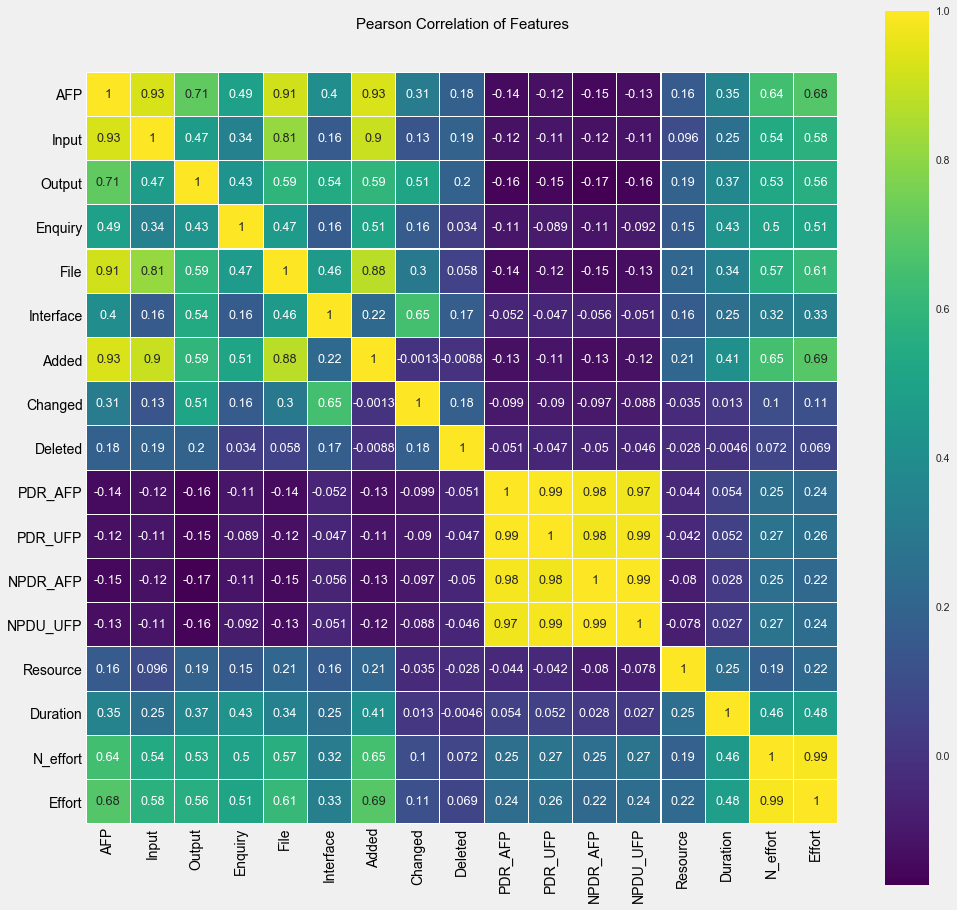

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
# sns.heatmap(my_df.drop(['id'], axis=1).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)
sns.heatmap(my_df.drop(['id', 'ID', 'Dev.Type'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

## Linear Regression


The regression analysis aims to verify the existence of a functional relationship between a variable with one or more variables, obtaining an equation that explains the variation of the dependent variable ***Y***, by the variation of the levels of the independent variables. The training of the *Linear Regression*  model consists of generating a regression for the target variable ***Y***. 

In [9]:
LR_model = LinearRegression()

max_corr_features = ['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Added']

X = my_df[max_corr_features]
y = my_df['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=37)

In [10]:
LR_model.fit(X_train, y_train)
print(LR_model.score(X_test, y_test))

0.643585557812945


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Support Vector Machine


*Support Vector Machine (SVM)* is a concept in computer science for a set of related supervised learning methods that analyze data and recognize patterns, used for classification and regression analysis. The standard Support Vector Machine takes a set of input data and predicts, for each given input, which of two possible classes the input is a member of, which makes the support vector machine a non-probabilistic binary linear classifier.

In [11]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10]}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)

max_corr_features = ['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Added']

X = my_df[max_corr_features]
y = my_df['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)

y_rbf = svr_rbf.fit(X_train, y_train)
# y_lin = svr_lin.fit(X_train, y_train)
# y_poly = svr_poly.fit(X_train, y_train)

print(y_rbf.score(X_test, y_test))
# print(y_lin.score(X_test, y_test))
# print(y_poly.score(X_test, y_test))


# LinearSVC.fit(X_train, y_train)

# print(LinearSVC.best_params_)

# print(LinearSVC.score(X_test, y_test))

-0.12575170902550714


In [13]:
# split into train and test
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')

# features = ['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Added']

max_corr_features = ['AFP', 'Input', 'Output', 'Enquiry', 'File', 'Added']

X = my_df[max_corr_features]
y = my_df['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
neigh.fit(X_train, y_train) 
print(neigh.score(X_test, y_test))

# mean_squared_error(y, neigh.score(X_test, y_test))

0.3936450093538375


In [15]:
plt.figure(figsize=(18,6))

for i, feature in enumerate(features):
   
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))

    
    plt.scatter(X_test[feature], y_test, label='Real data', lw=1,alpha= 0.7, c='k' )
    plt.plot(model_xs, model_ys , lw=1, label='Linear Regression Model')
    plt.plot(xs, ys , lw=1,label='K Neighbors Regressor Model', c='r')
    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()

NameError: name 'features' is not defined